In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import sklearn.metrics as metrics
import numpy as np
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
import math
%matplotlib inline

In [73]:
X, y = make_blobs(n_samples=500, centers=2, random_state=1)

In [74]:
print(X.shape)
print(y.shape)

(500, 2)
(500,)


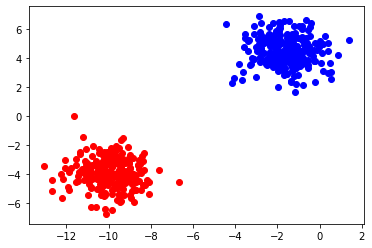

In [75]:
colors = ['blue','red']
for i, x in enumerate(X):
    plt.scatter(x[0],x[1],color=colors[y[i]])
plt.show()

In [140]:
# prediction function (sigmoid)
def predict_function(inputs,B):
    y_predict = []
    for input in inputs:
        prediction_current = 1/(1+np.exp(-(input[0]*B[0]+input[1]*B[1]+B[2])))
        y_predict.append(prediction_current)
    return y_predict
# loss function (cross_entropy)
def loss_function(predictions,labels):
    cross_entropy_total = 0
    for i in range(len(predictions)):   
        cross_entropy_total -= ((labels[i]*np.log2(predictions[i]))+((1-labels[i])*np.log2(1-predictions[i])))
    return cross_entropy_total/len(predictions)
# loss function (cross_entropy) gradient
def loss_grad_function(predictions,labels,X):
    grad = [0,0,0]
    for i in range(len(predictions)):
        current_temp = (predictions[i]-labels[i])
        grad[0] += current_temp*X[i][0]
        grad[1] += current_temp*X[i][1]
        grad[2] += current_temp
    grad[0] = grad[0]/len(predictions)
    grad[1] = grad[1]/len(predictions)
    grad[2] = grad[2]/len(predictions)
    return grad

In [142]:
B = [0,0,0]
learning_rate = 0.01
for iteration in range(100):
    predictions = predict_function(X,B)
    loss = loss_function(predictions,y)
    loss_grad = loss_grad_function(predictions,y,X)
    print("Iteration: ", iteration)
    print("Loss: ", loss)
    print("Loss Grad: ", loss_grad)
    print("B: ", B)
    B[0] -= learning_rate*loss_grad[0]
    B[1] -= learning_rate*loss_grad[1]
    B[2] -= learning_rate*loss_grad[2]
print(B)

Iteration:  0
Loss:  1.0
Loss Grad:  [2.0861762171847893, 2.101194563156978, 0.0]
B:  [0, 0, 0]
Iteration:  1
Loss:  0.8815755175768111
Loss Grad:  [1.734448499247915, 1.920575921975714, 0.028583347978985155]
B:  [-0.020861762171847893, -0.02101194563156978, 0.0]
Iteration:  2
Loss:  0.7907109766149376
Loss Grad:  [1.4471286432098514, 1.7671427156694015, 0.051036468686945696]
B:  [-0.038206247164327044, -0.04021770485132692, -0.00028583347978985155]
Iteration:  3
Loss:  0.7194967893745876
Loss Grad:  [1.2167506213434778, 1.6379862022945493, 0.06809624759800423]
B:  [-0.05267753359642556, -0.057889132008020934, -0.0007961981666593084]
Iteration:  4
Loss:  0.6622960624243015
Loss Grad:  [1.032682047779494, 1.5288617701114702, 0.08080742269528725]
B:  [-0.06484503980986034, -0.07426899403096643, -0.0014771606426393507]
Iteration:  5
Loss:  0.615241514785166
Loss Grad:  [0.8849466488486127, 1.4357520229953207, 0.09014857455349488]
B:  [-0.07517186028765528, -0.08955761173208113, -0.0022852

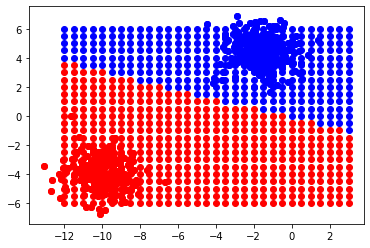

In [143]:
colors = ['blue','red']
for i, x in enumerate(X):
    plt.scatter(x[0],x[1],color=colors[y[i]])
starting_x = -12
while starting_x<=3:
    starting_y= -6
    while starting_y<=6:
        labeli = predict_function([[starting_x,starting_y]],B)[0]
        colorUse = ""
        if(labeli<0.5):
            colorUse = "blue"
        else:
            colorUse = "red"
        plt.scatter(starting_x,starting_y,color=colorUse)
        starting_y = starting_y + 0.5
    starting_x = starting_x + 0.5
for i, x in enumerate(X):
    plt.scatter(x[0],x[1],color=colors[round(predict_function([x],B)[0])])
plt.show()
